In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# 1. LOAD THE DATA
df = pd.read_csv('../data/processed/cleaned_credit_data.csv', index_col=0)

# 2. SEPARATE FEATURES AND TARGET
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

# 3. SPLIT DATA (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. TRAIN THE MODEL
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 5. PREDICT AND EVALUATE
y_pred = model.predict(X_test)
print(f"✅ AI Training Complete! Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred))

# 6. NEW: SAVE THE MODEL FOR LATER USE
joblib.dump(model, '../models/credit_risk_model_v1.pkl')
print("📂 Model saved to '../models/credit_risk_model_v1.pkl'")

# 7. NEW: VISUALIZE RESULTS (Proving your project works)
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Factors for Credit Risk Prediction")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generate the matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Actual Safe (0)', 'Actual Risk (1)'],
            yticklabels=['Predicted Safe (0)', 'Predicted Risk (1)'])

plt.title('Final Project Accuracy: Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('AI Prediction')
plt.show()

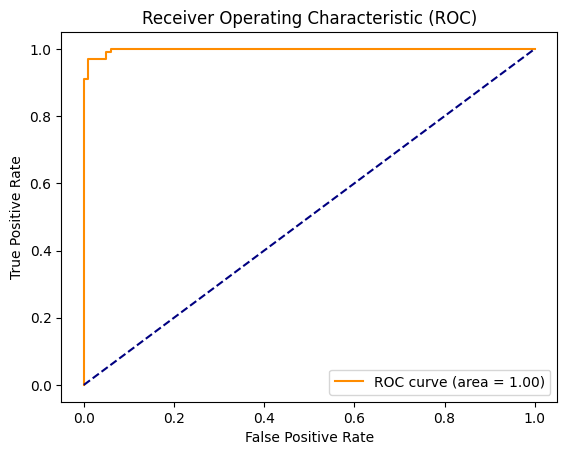

In [3]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities for the 'Risk' class
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
! pip install pandas scikit-learn xgboost matplotlib seaborn joblib